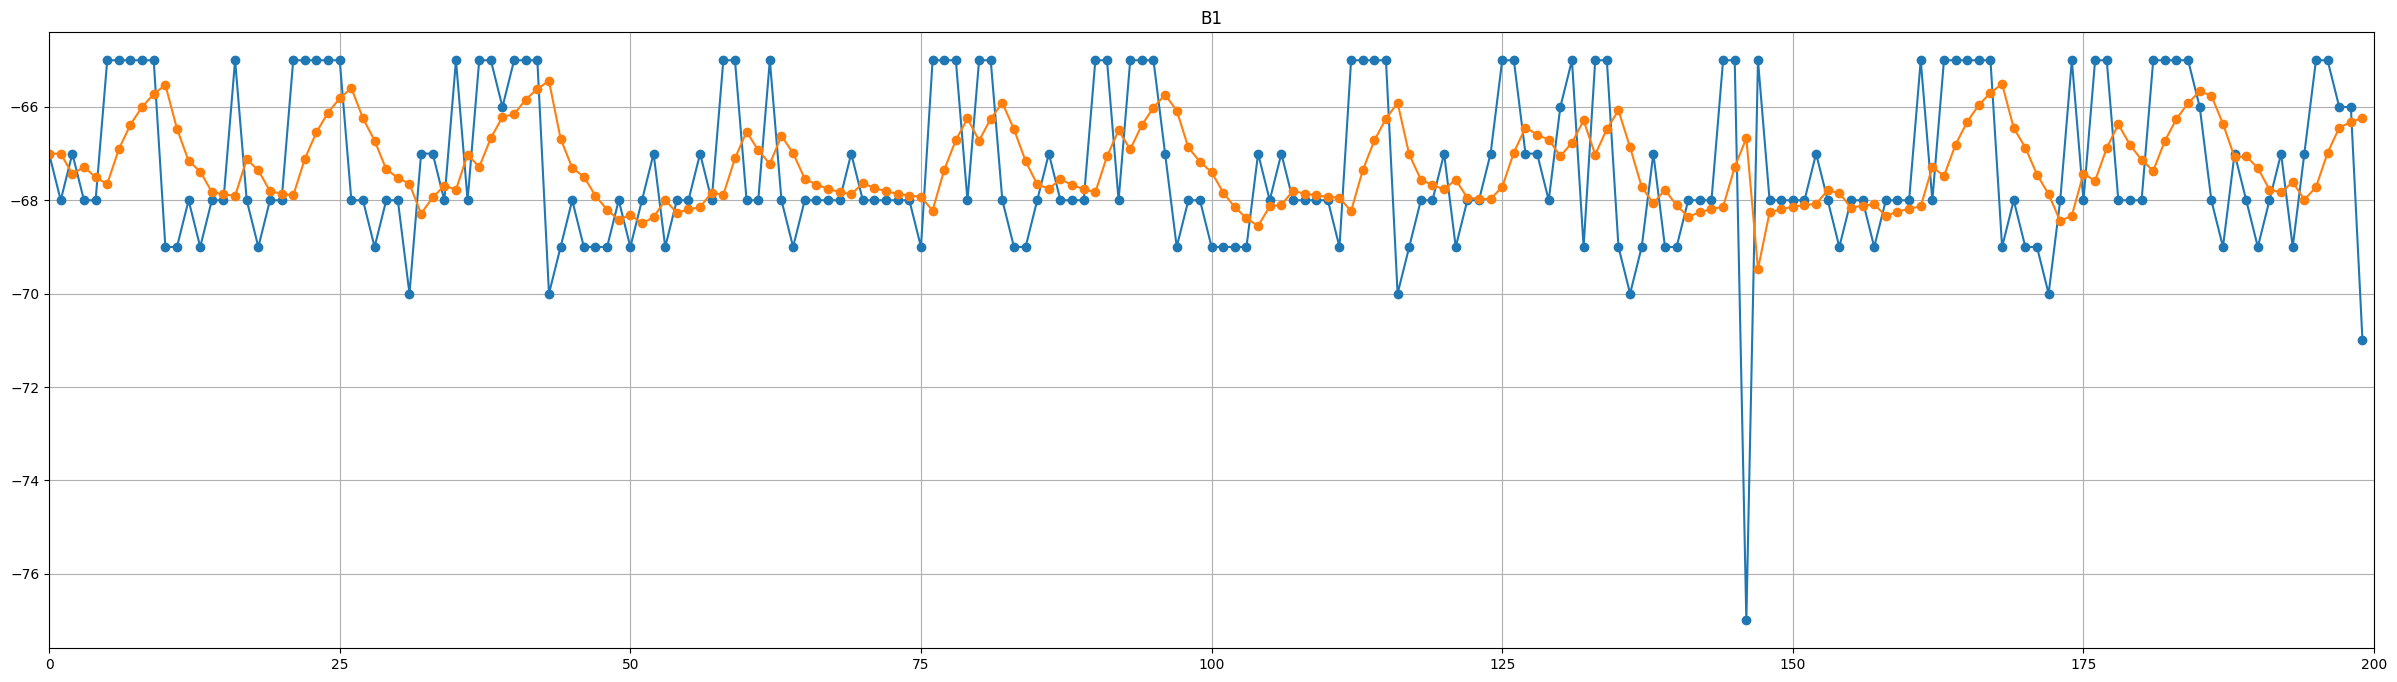

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("C:/Users/pc/Downloads/data14_8.csv")

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)




dt = 1.0/900
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)


B1 = data['B1']

initial_state = np.array([[B1[0]], [0], [0]])

kf = KalmanFilter(F = F, H = H, Q = Q, R = R, x0 = initial_state)
predictions1 = []


for z in B1[0:200]:
    predictions1.append(np.dot(H,  kf.predict())[0])
    kf.update(z)



fig, ax = plt.subplots(1, figsize=(30,8))


ax.plot(range(len(B1[0:200])), B1[0:200], label = 'M_1m',marker='o')
ax.plot(range(len(predictions1)), np.array(predictions1), label = 'K_1m',marker='o')
ax.set_title('B1')
ax.set_xlim(0,200)
ax.grid()

plt.grid(True)

plt.show()


In [9]:
list = []
for i in range(200):
    list.append(np.array(predictions1[i]))

In [11]:
def tinh_trung_binh(lst):
    if len(lst) == 0:
        return 0  # Trường hợp danh sách rỗng
    else:
        return sum(lst) / len(lst)



trung_binh = tinh_trung_binh(predictions1)
print("Trung bình của danh sách:", trung_binh)

Trung bình của danh sách: [-67.27835019]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data1 = pd.read_csv("C:/Users/pc/Downloads/Ketqua.csv")

_3AE = data1['4'].iloc[:20]
_3AE = sorted(_3AE)
_3_AEKalman = data1['3'].iloc[:20]
_3_AEKalman = sorted(_3_AEKalman)

_3CAE = data1['2'].iloc[:20]
_3CAE = sorted(_3CAE)
_3_CAEKalman = data1['1'].iloc[:20]
_3_CAEKalman = sorted(_3_CAEKalman)


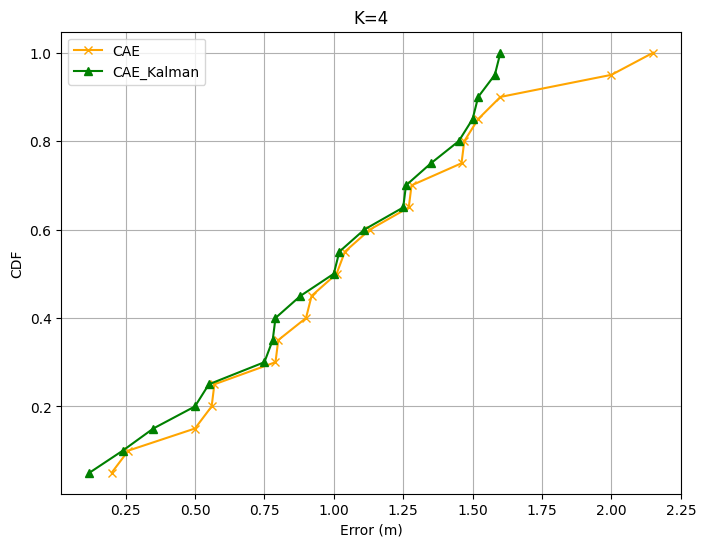

In [44]:
fig, ax = plt.subplots(1, figsize=(8,6))

cdf = np.arange(1, 20 + 1) / 20

#ax.plot(_3AE, cdf,label = 'AE', marker =  '*', linestyle='-', color = 'red')
#ax.plot(_3_AEKalman, cdf,label = 'AE_Kalman', marker =  'o', color = 'blue')
ax.plot(_3CAE, cdf,label = 'CAE',  marker =  'x', linestyle='-', color = 'orange')
ax.plot(_3_CAEKalman, cdf,label = 'CAE_Kalman', marker =  '^',  linestyle='-', color = 'green' )

ax.set_title('K=4')
ax.grid()
plt.xlabel('Error (m)')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()
plt.show()